In [ ]:
!pip install --upgrade xlrd

In [ ]:
!pip install pmdarima

In [ ]:
!pip install statsmodels==0.12.1

In [ ]:
import pandas as pd 
import pandas_datareader as web 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2014_2022_MCH_exp_1.xls to 2014_2022_MCH_exp_1.xls


In [ ]:
read_file = pd.read_excel('2014_2022_MCH_exp_1.xls') #can give an error if the file had been already saved to google colab and still stays in its memory. If it happens so, just keep run next cells
read_file.to_csv ('2014_2022_MCH_exp_1.xls', index = None, header=True)

In [ ]:
df = pd.read_csv('2014_2022_MCH_exp_1.xls')
df.head()

,날짜,총수량,총금액,최대금액,최저금액,평균금액
0,2014-01,570,1780050,3899,2060,3123
1,2014-02,1260,3579660,4350,2000,2841
2,2014-03,5069,13810800,4000,2000,2725
3,2014-04,4020,11467230,3850,2000,2853
4,2014-05,1500,3647115,3188,1500,2431


In [ ]:
df['날짜'] = pd.to_datetime(df['날짜'], errors = 'coerce')
df.set_index('날짜', inplace=True)
ts = df['총수량']
ts

날짜
2014-01-01     570
2014-02-01    1260
2014-03-01    5069
2014-04-01    4020
2014-05-01    1500
2014-05-01      15
2014-06-01     870
2014-07-01     720
2014-08-01    2033
2014-09-01    4044
2014-10-01     810
2014-11-01     540
2014-12-01     900
2015-01-01    1155
2015-02-01    1350
2015-03-01    3675
2015-04-01    2082
2015-05-01    2014
2015-06-01     597
2015-07-01    1440
2015-08-01     510
2015-09-01     853
2015-10-01    1425
2015-11-01     970
2015-12-01     974
2016-01-01    1314
2016-02-01    2620
2016-03-01    2098
2016-04-01    1680
2016-05-01    1033
2016-06-01     240
2016-07-01     915
2016-08-01     630
2016-09-01     930
2016-10-01     675
2016-11-01     360
2016-12-01     776
2017-01-01     435
2017-02-01     420
2017-03-01     899
2017-04-01     972
2017-05-01     792
2017-07-01     105
2017-08-01      15
2017-09-01     297
2017-10-01     150
2017-11-01     132
2017-12-01     195
2018-01-01     312
2018-02-01     855
2018-03-01    2441
2018-04-01    3540
2018-05-0

In [ ]:
ts_a = df['평균금액']
ts_a

날짜
2014-01-01    3123
2014-02-01    2841
2014-03-01    2725
2014-04-01    2853
2014-05-01    2431
2014-05-01    2111
2014-06-01    2274
2014-07-01    3310
2014-08-01    3165
2014-09-01    2829
2014-10-01    2014
2014-11-01    2163
2014-12-01    2383
2015-01-01    2219
2015-02-01    2281
2015-03-01    2716
2015-04-01    2438
2015-05-01    2536
2015-06-01    2096
2015-07-01    2367
2015-08-01    2074
2015-09-01    2437
2015-10-01    2081
2015-11-01    2186
2015-12-01    2955
2016-01-01    3789
2016-02-01    3409
2016-03-01    2552
2016-04-01    2070
2016-05-01    1970
2016-06-01    1554
2016-07-01    2530
2016-08-01    1883
2016-09-01    2114
2016-10-01    2080
2016-11-01    2003
2016-12-01    3830
2017-01-01    2392
2017-02-01    2077
2017-03-01    2277
2017-04-01    2506
2017-05-01    1950
2017-07-01    1903
2017-08-01    3366
2017-09-01    2138
2017-10-01    2310
2017-11-01    2870
2017-12-01    2883
2018-01-01    3380
2018-02-01    2619
2018-03-01    2875
2018-04-01    2556
2018-05-0

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101 entries, 2014-01-01 to 2022-05-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총수량     101 non-null    int64
 1   총금액     101 non-null    int64
 2   최대금액    101 non-null    int64
 3   최저금액    101 non-null    int64
 4   평균금액    101 non-null    int64
dtypes: int64(5)
memory usage: 4.7 KB
None


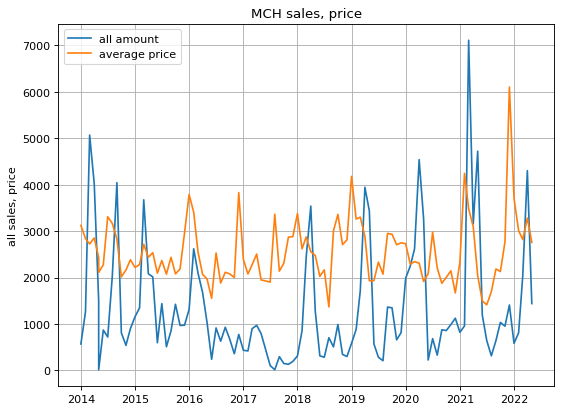

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, label='all amount')
plt.plot(ts_a, label='average price')
plt.title('MCH sales, price')
plt.ylabel('all sales, price')
plt.legend()
plt.grid()
plt.show()

날짜
2022-01-01     584
2022-02-01     810
2022-03-01    2039
2022-04-01    4302
2022-05-01    1440
Name: 총수량, dtype: int64
날짜
2022-01-01    3705
2022-02-01    3012
2022-03-01    2817
2022-04-01    3282
2022-05-01    2757
Name: 평균금액, dtype: int64


Text(0.5, 1.0, 'Train/Test split for data')

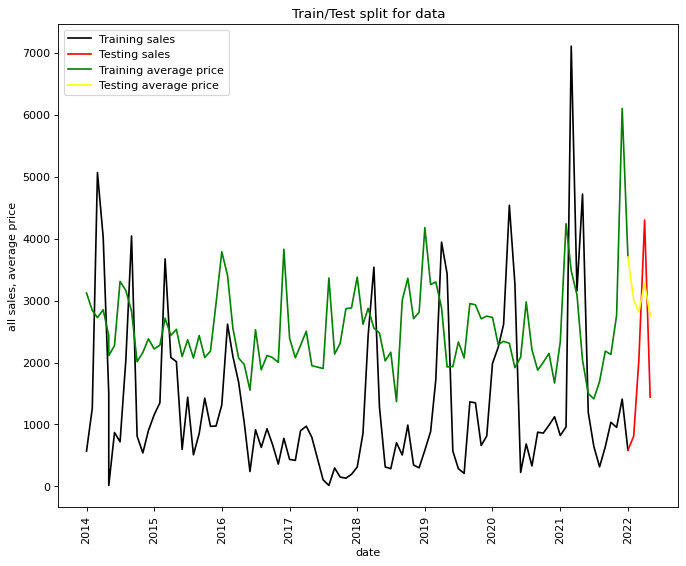

In [ ]:
train = ts[:'2022-01-01']
test = ts['2022-01-01':]
train_a = ts_a[:'2022-01-01']
test_a = ts_a['2022-01-01':]
print(test)
print(test_a)
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(train, color = "black", label = 'Training sales')
plt.plot(test, color = "red", label = 'Testing sales')
plt.plot(train_a, color = "green", label = 'Training average price')
plt.plot(test_a, color = "yellow", label = 'Testing average price')
plt.ylabel('all sales, average price')
plt.xlabel('date')
plt.legend()
plt.xticks(rotation=90)
plt.title("Train/Test split for data")

In [ ]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The time series are stationary')
    else:
        print('The time series are NOT stationary')

In [ ]:
check_stationarity(train) #sales

The time series are NOT stationary


In [ ]:
check_stationarity(train_a) #average price

The time series are stationary


In [ ]:
ts_diff = train.diff()
ts_diff.dropna(inplace=True)
check_stationarity(ts_diff)

The time series are stationary


for sales only

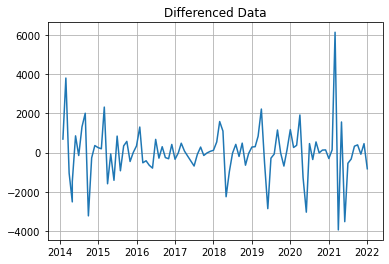

In [ ]:
plt.plot(ts_diff)
plt.title('Differenced Data')
plt.grid()
plt.show()

automatically setted parameters with multi-step forcasting model

In [ ]:
import pmdarima as pm
stepwise_model = pm.auto_arima(train,start_p=1, d=1, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model.fit(train) #sales

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

In [ ]:
stepwise_model_a = pm.auto_arima(train_a,start_p=1, d=0, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model_a.fit(train_a) #average price

ARIMA(order=(5, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [ ]:
n_test = test.shape[0]

In [ ]:
n_test_a = test_a.shape[0]

In [ ]:
ts_pred_auto = stepwise_model.predict(n_periods=n_test) #sales

In [ ]:
ts_pred_auto_a = stepwise_model_a.predict(n_periods=n_test_a) #average price 평균금액

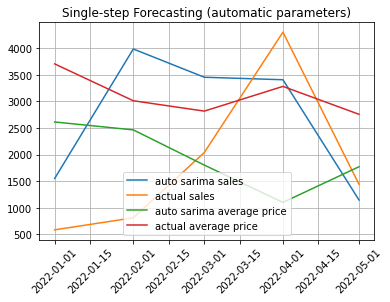

In [ ]:
plt.plot(test.index,ts_pred_auto, label='auto sarima sales')
plt.plot(test, label='actual sales')
plt.plot(test_a.index,ts_pred_auto_a, label='auto sarima average price')
plt.plot(test_a, label='actual average price')
plt.title('Single-step Forecasting (automatic parameters)')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
nrmse = rmse(ts_pred_auto, test)/(np.max(test)-np.min(test))
nrmse

0.44857956037907143

In [ ]:
nrmse_a = rmse(ts_pred_auto_a, test_a)/(np.max(test_a)-np.min(test_a))
nrmse_a #average price (평균금액)

1.3556690016716741

Conclusion: for average price (평균금액) the prediction is not accurate enough since the error is bigger than one, however, it is possible to see the general trend of average price. For sales prediction is okay to believe and predict with this model. Probably for average price (평균금액) parameters should be used tge different model.